## Importing

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [4]:
df = pd.read_json('cleaned_data.json')
pd.pandas.set_option('display.max_columns', None)
df.head(20)

,Name,Address,Author,Price,Bedrooms,Showers,Parking,Furnish,Total Developed,Features,Facilities,Nearby Places,URL,Timestamp,City,Region,Island,Type,NFeatures,NFacilities,NNearby Places
0,"3 BR Condo in The Grand Midori Ortigas, Pasig",,"Federal Land, Inc.",29700000,3,3.0,2,0,107.0,"[Ensuite, Range Hood, Stove/Burner]","[Conference Room, Entertainment Area, Function...","[School, Hospital]",https://propertyaccess.ph/property/3-br-condo-...,2022-10-23,Pasig,National Capital Region,Luzon,Condo,3,11,2
1,"1 Bedroom Condo in The Grand Midori Ortigas, P...",,"Federal Land, Inc.",10200000,1,1.0,0,0,46.0,[Fiber ready],"[Conference Room, Entertainment Area, Function...","[School, Hospital]",https://propertyaccess.ph/property/1br-condo-i...,2022-10-23,Pasig,National Capital Region,Luzon,Condo,1,11,2
2,"3 Bedroom Condo in Aurelia Residences, Taguig","McKinley Parkway, Taguig, Metro Manila",Shang Properties,107300000,3,4.0,2,0,242.0,"[Central air conditioning, Balcony, Built-in w...","[Security, CCTV, Entertainment Area, Fitness C...","[School, Hospital, Mall, Transportation hub]",https://propertyaccess.ph/property/3-bedroom-c...,2022-10-23,Taguig,National Capital Region,Luzon,Condo,10,15,4
3,3 Bedroom Condo in Shang Residences at Wack Wa...,"Wack Wack Road, Mandaluyong, Metro Manila",Shang Properties,54500000,3,4.0,3,0,231.0,"[Central air conditioning, Balcony, Built-in w...","[Security, CCTV, Club House, Entertainment Are...","[School, Hospital, Mall, Transportation hub]",https://propertyaccess.ph/property/3-bedroom-c...,2022-10-23,Mandaluyong,National Capital Region,Luzon,Condo,9,16,4
4,"2BR Condo in Residences at The Galleon, Pasig",,Ortigas Land,41500000,2,2.0,2,0,109.0,"[Central air conditioning, Balcony, Built-in w...","[Security, CCTV, Clubhouse, Connected to mall,...","[School, Hospital, Mall, Transportation hub]",https://propertyaccess.ph/property/2br-condo-i...,2022-10-23,Pasig,National Capital Region,Luzon,Condo,7,14,4
5,"Penthouse in Residences at The Galleon, Pasig","ADB Avenue, Pasig, Metro Manila",Ortigas Land,111500000,3,4.0,4,0,268.0,"[Central air conditioning, Balcony, Built-in w...","[Security, CCTV, Clubhouse, Connected to mall,...","[School, Hospital, Mall, Transportation hub]",https://propertyaccess.ph/property/penthouse-i...,2022-10-23,Pasig,National Capital Region,Luzon,Condo,7,14,4
6,"3 Bedroom Condo in Aurelia Residences, Taguig","McKinley Parkway, Taguig, Metro Manila",Shang Properties,181302240,3,4.0,3,0,337.0,[Central air conditioning],"[Security, CCTV, Entertainment Area, Fitness C...","[School, Hospital, Mall, Transportation hub]",https://propertyaccess.ph/property/3-bedroom-c...,2022-10-23,Taguig,National Capital Region,Luzon,Condo,1,15,4
7,"3 Bedroom Condo in Valencia Hills Tower E, Que...","Quezon City, Metro Manila","Federal Land, Inc.",19837000,3,3.0,1,0,101.0,"[Balcony, Ensuite]","[Security, CCTV, Fitness Center]","[School, Hospital, Mall, Transportation hub]",https://propertyaccess.ph/property/3-bedroom-c...,2022-10-23,Quezon,National Capital Region,Luzon,Condo,2,3,4
8,"2 Bedroom Condo in Valencia Hills Tower E, Que...","Quezon City, Metro Manila","Federal Land, Inc.",12023000,2,2.0,1,0,61.0,"[Balcony, Ensuite]","[Security, CCTV, Fitness Center]","[School, Hospital, Mall, Transportation hub]",https://propertyaccess.ph/property/2-bedroom-c...,2022-10-23,Quezon,National Capital Region,Luzon,Condo,2,3,4
9,"1 Bedroom Condo in Valencia Hills Tower E, Que...","Quezon City, Metro Manila","Federal Land, Inc.",9534000,1,2.0,0,0,51.0,"[Balcony, Ensuite]","[Security, CCTV, Fitness Center]","[School, Hospital, Mall, Transportation hub]",https://propertyaccess.ph/property/1-bedroom-c...,2022-10-23,Quezon,National Capital Region,Luzon,Condo,2,3,4


## Clustering

## RQ 1 [needs visualization]
What is the average price of houses in a given area? (sort by rank)

Answer:

In [111]:
r1city = df.groupby(['Type', 'City'])['Price'].mean().sort_values(ascending=False).reset_index()
r1city

,Type,City,Price
0,Condo,Malay,1.975000e+08
1,House,Makati,1.290667e+08
2,House,Muntinlupa,9.889375e+07
3,House,Manila,8.944438e+07
4,House,Quezon,6.970911e+07
...,...,...,...
98,Condo,San Jose Del Monte,2.200000e+06
99,House,Cabanatuan,1.927857e+06
100,House,San Jose Del Monte,1.834000e+06
101,House,Mabalacat,1.731500e+06


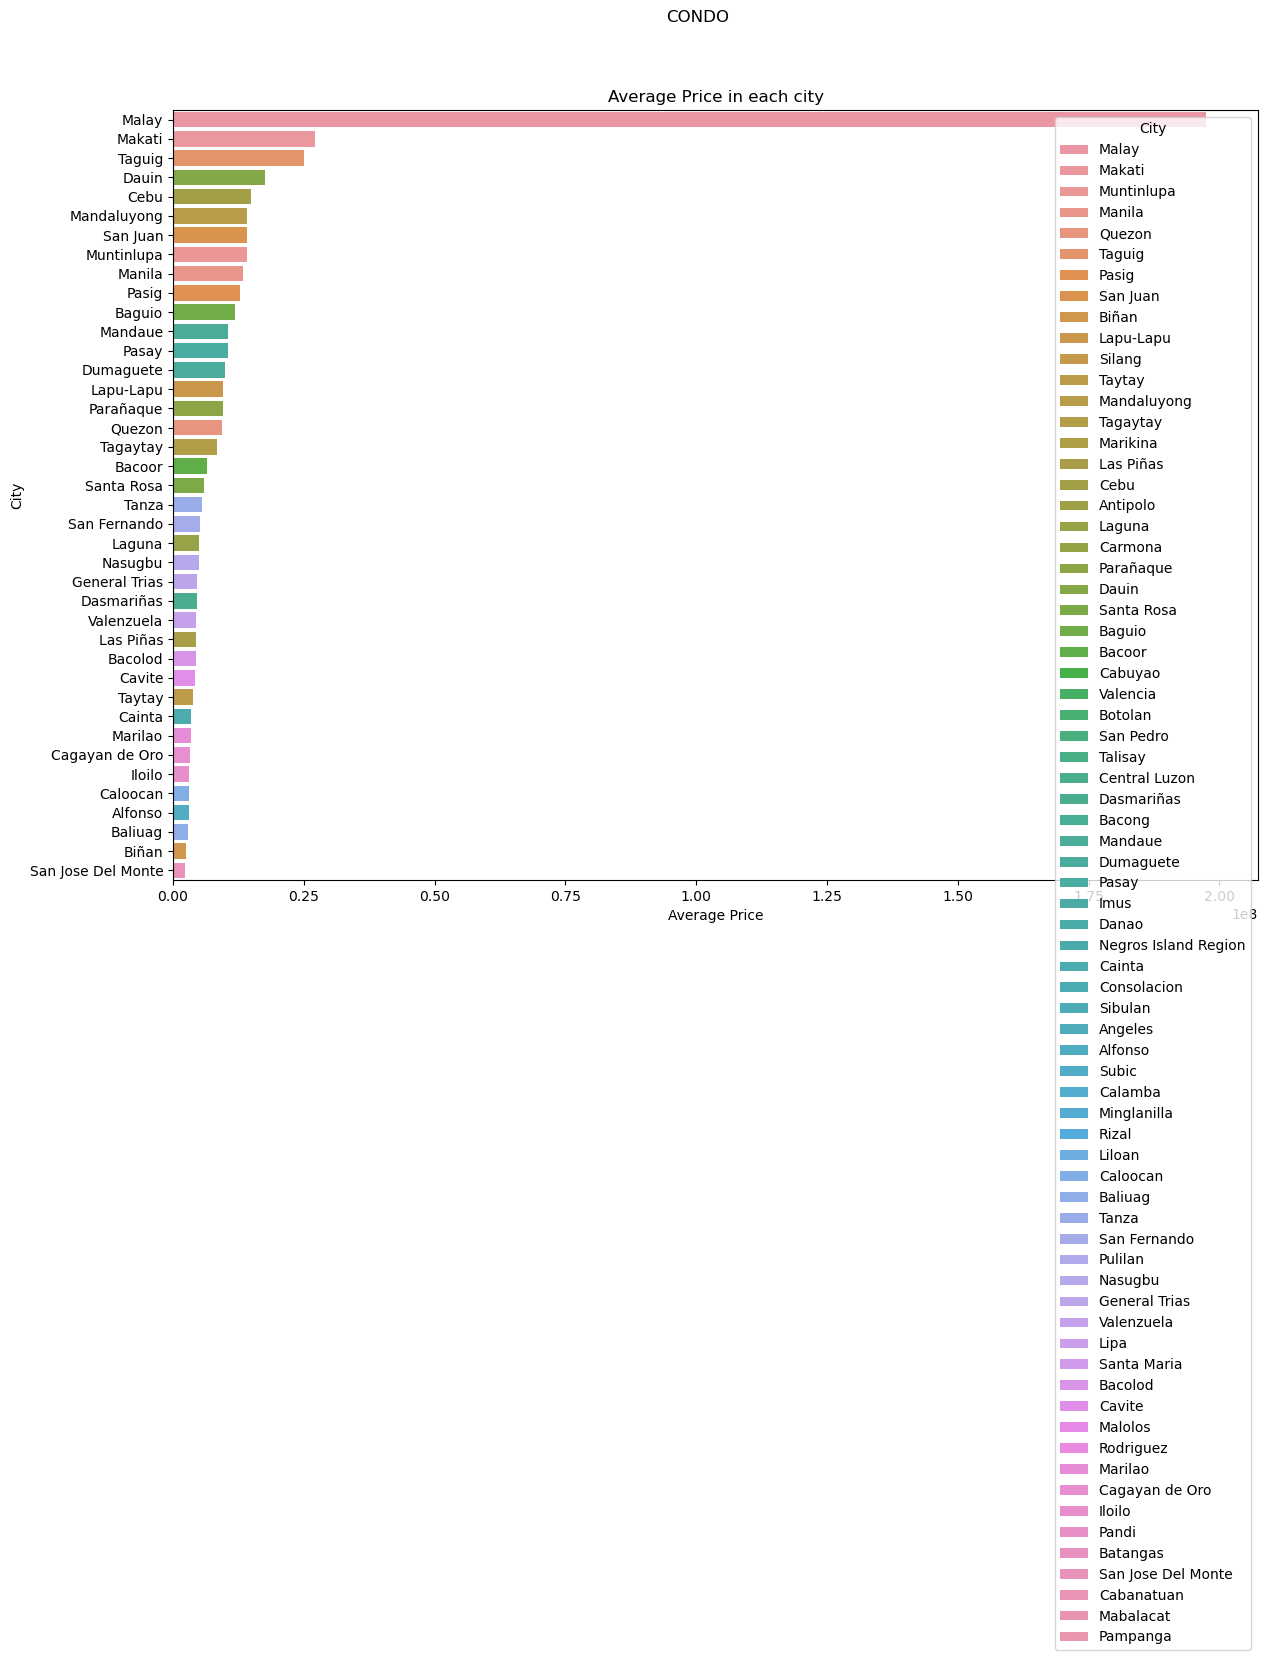

In [144]:
plt.figure(figsize=(14,10))
r1citycondo = r1city[r1city.Type == "Condo"]
sns.barplot(x = r1citycondo["Price"], y = r1citycondo["City"], hue=r1city["City"], dodge=False, ci=None)
plt.xlabel("Average Price")
plt.ylabel("City")
plt.suptitle("CONDO")
plt.title("Average Price in each city")
plt.show()

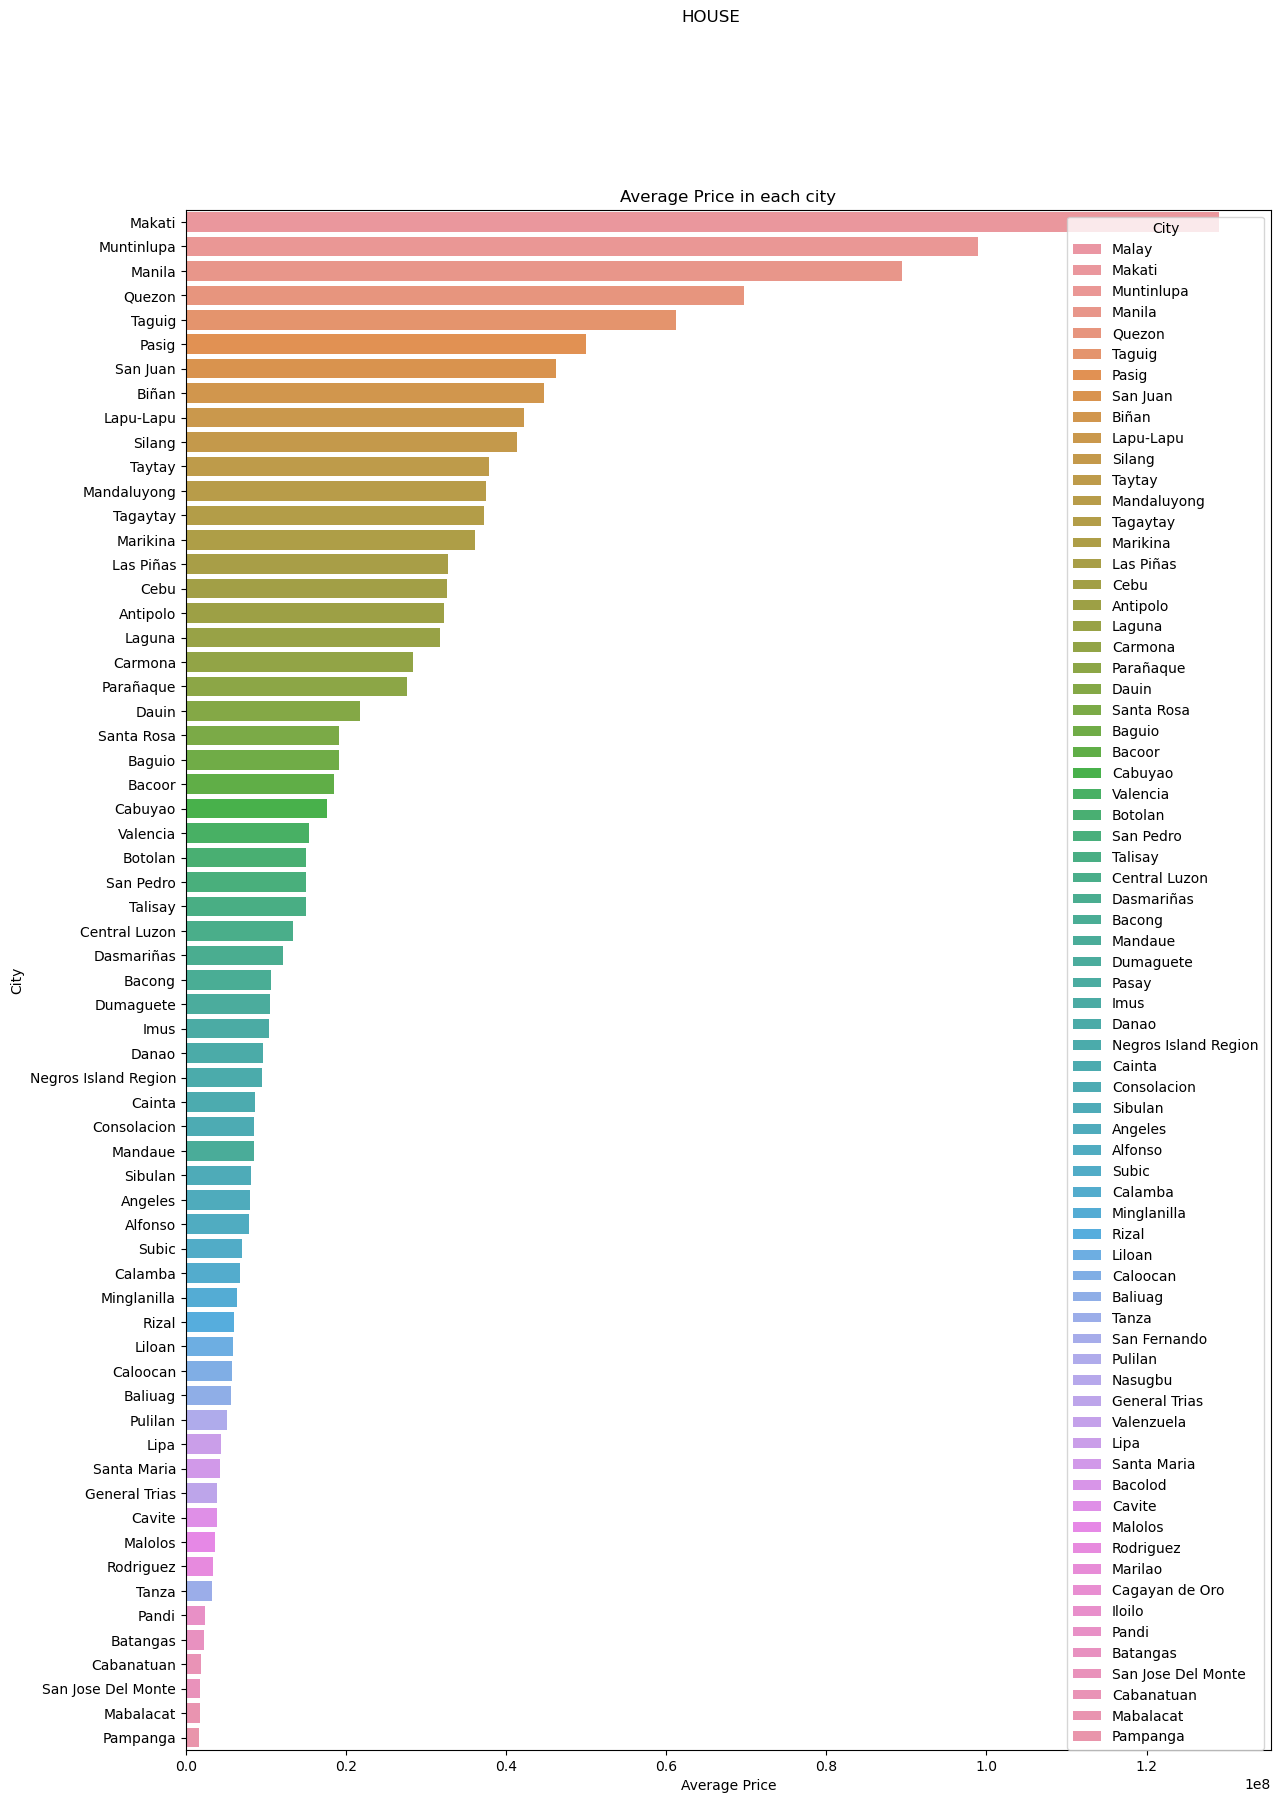

<Figure size 640x480 with 0 Axes>

In [145]:
plt.figure(figsize=(14,20))
r1cityhouse = r1city[r1city.Type == "House"]
sns.barplot(x = r1cityhouse["Price"], y = r1cityhouse["City"], hue=r1city["City"], dodge=False, ci=None)
plt.xlabel("Average Price")
plt.ylabel("City")
plt.suptitle("HOUSE")
plt.title("Average Price in each city")
plt.show()
plt.tight_layout()

In [114]:
r1region = df.groupby(['Type', 'Region'])['Price'].mean().sort_values(ascending=False).reset_index()
r1region

,Type,Region,Price
0,Condo,Western Visayas,6.831117e+07
1,House,National Capital Region,5.535285e+07
2,House,Cordillera Administrative Region,1.916667e+07
3,Condo,National Capital Region,1.853212e+07
4,House,Calabarzon,1.804468e+07
5,House,Northern Mindanao,1.535000e+07
6,Condo,Central Visayas,1.470068e+07
7,House,Central Visayas,1.458560e+07
8,Condo,Cordillera Administrative Region,1.176154e+07
9,Condo,Calabarzon,5.906663e+06


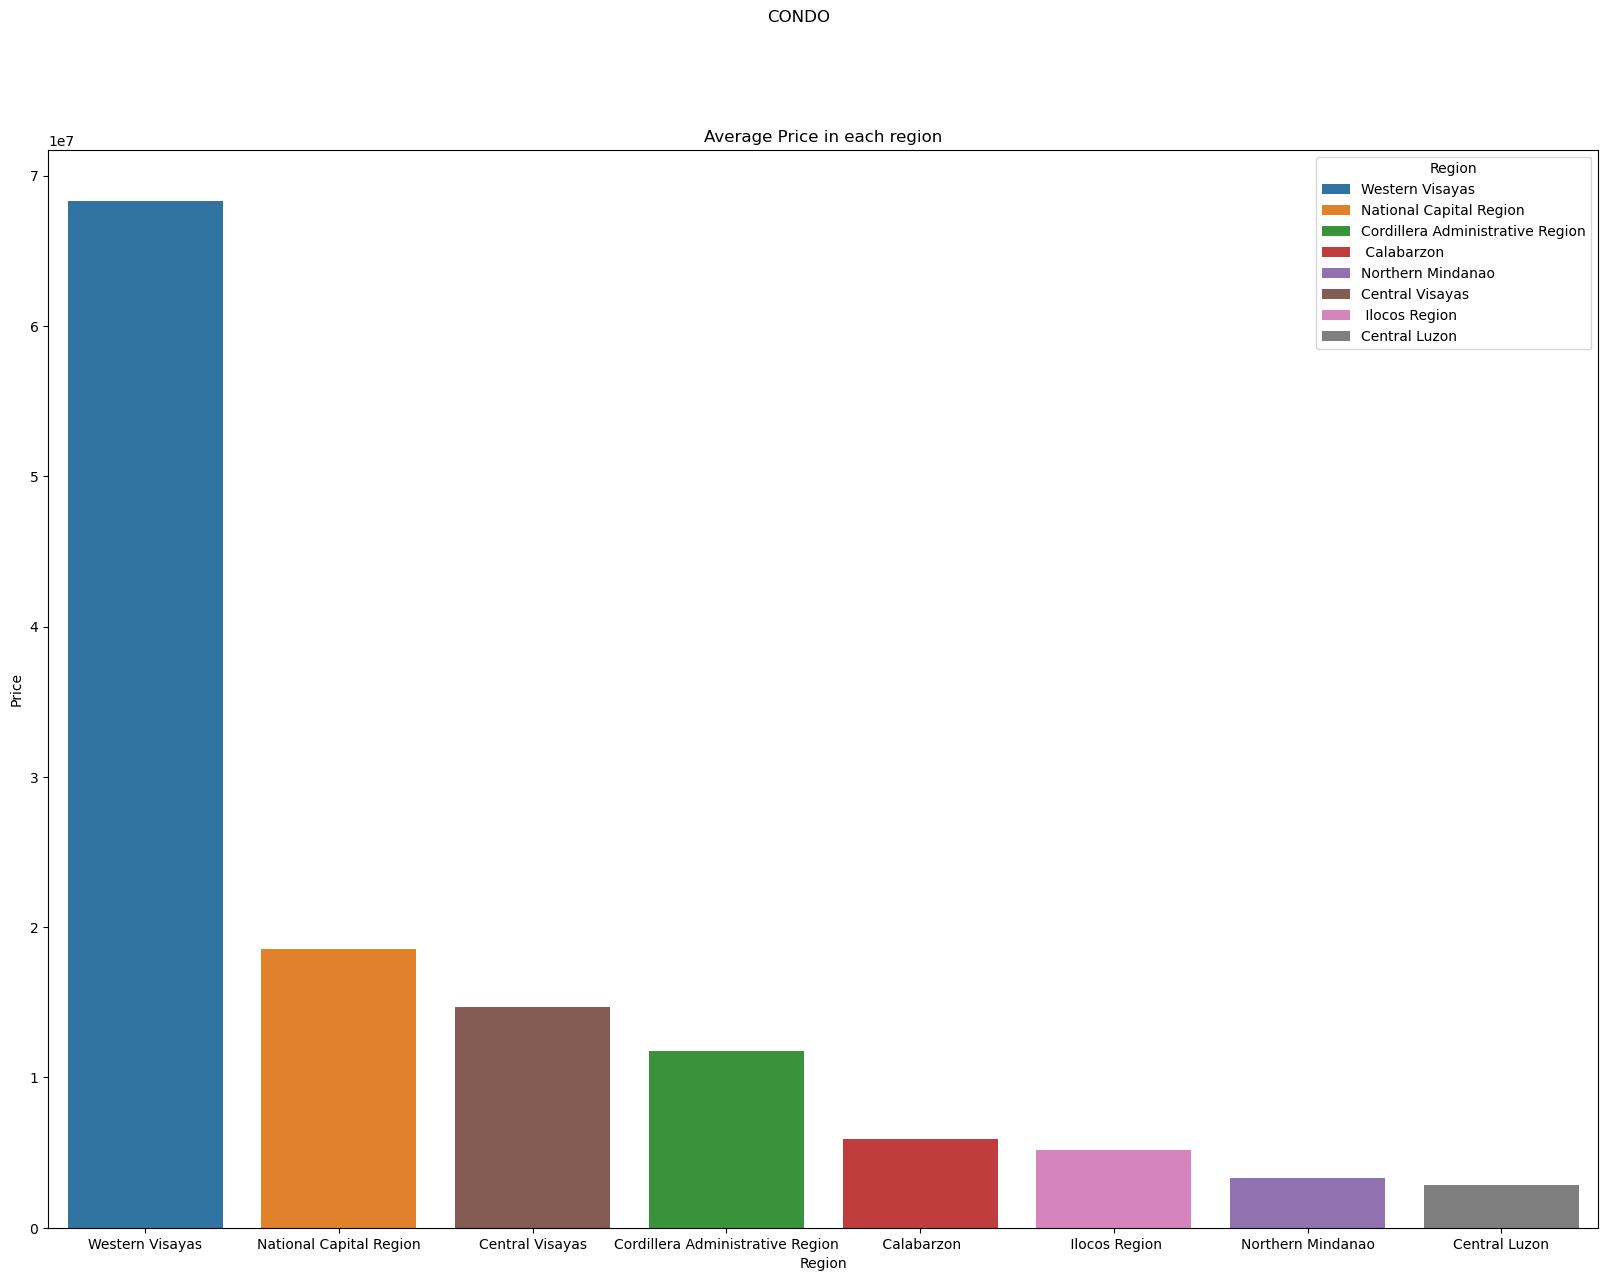

In [146]:
plt.figure(figsize=(20,14))
r1regioncondo = r1region[r1region.Type == "Condo"]
sns.barplot(x = r1regioncondo["Region"], y = r1regioncondo["Price"], hue=r1region["Region"], dodge=False, ci=None)
plt.xlabel("Region")
plt.ylabel("Price")
plt.suptitle("CONDO")
plt.title("Average Price in each region")
plt.show()

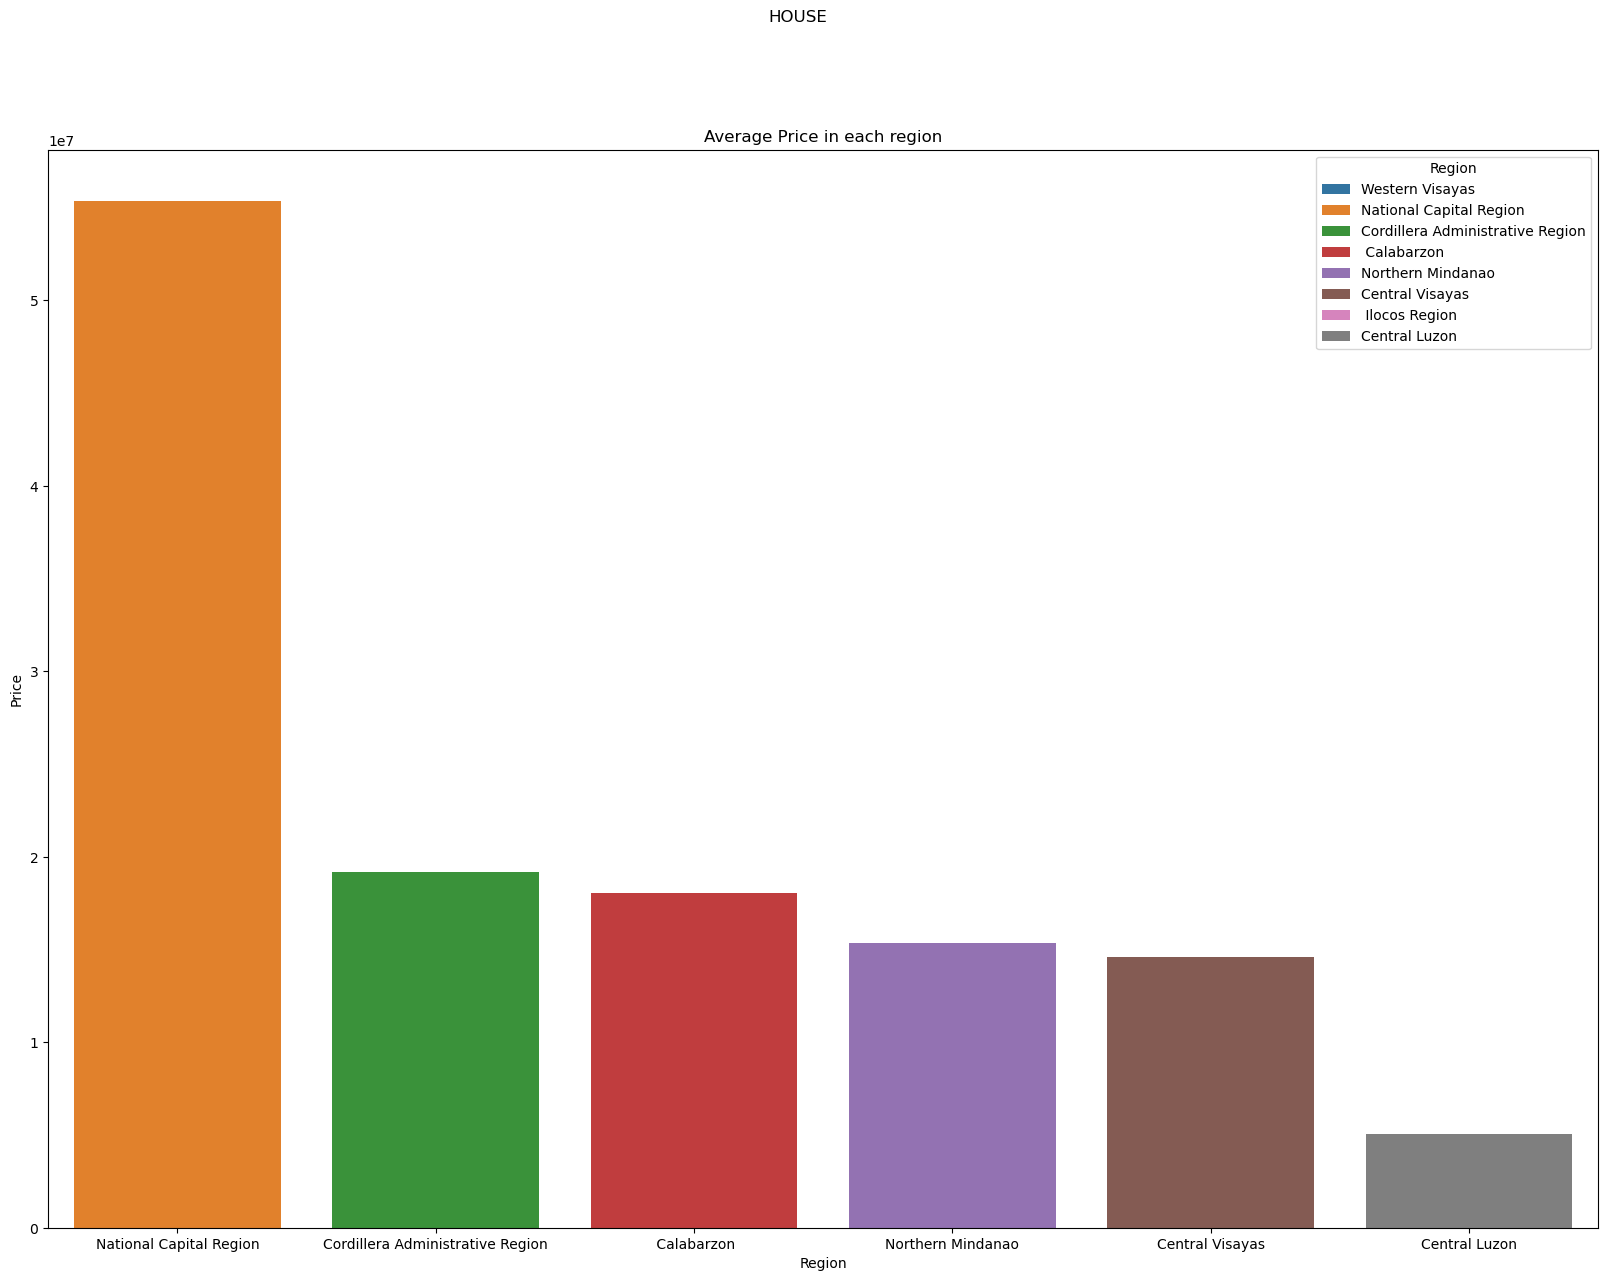

In [147]:
plt.figure(figsize=(20,14))
r1regionhouse = r1region[r1region.Type == "House"]
sns.barplot(x = r1regionhouse["Region"], y = r1regionhouse["Price"], hue=r1region["Region"], dodge=False, ci=None)
plt.xlabel("Region")
plt.ylabel("Price")
plt.suptitle("HOUSE")
plt.title("Average Price in each region")
plt.show()

In [118]:
r1island = df.groupby(['Type', 'Island'])['Price'].mean().sort_values(ascending=False).reset_index()

In [166]:
colors={'Luzon':'red', 
        'Visayas':'green',
        'Mindanao':'blue'}

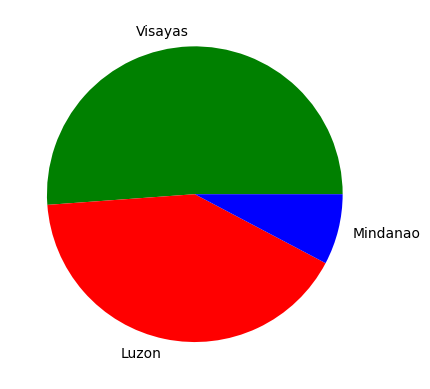

In [167]:
r1islandcondo = r1island[r1island.Type == "Condo"]
plt.pie(r1islandcondo["Price"], labels = r1islandcondo["Island"], colors=[colors[v] for v in r1islandcondo["Island"].value_counts().keys()])
plt.show()

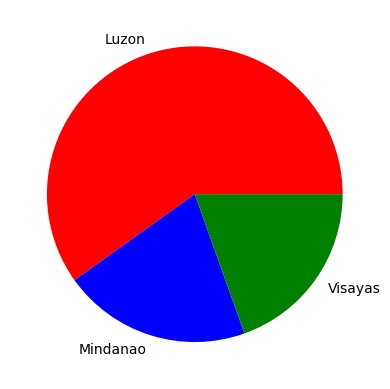

In [168]:
r1islandhouse = r1island[r1island.Type == "House"]
plt.pie(r1islandhouse["Price"], labels = r1islandhouse["Island"], colors=[colors[x] for x in r1islandhouse["Island"].value_counts().keys()])
plt.show()

## RQ 2 (don't think this can be answered)
What is the behavior of the price of houses over time? (historical)


Answer:

## RQ 2
Which is the average house price of a given land developer? (sort by rank)

Answer:

In [201]:
r2author = df[df.Type == "House"]
top_ten = r2author["Author"].value_counts().index[:10]
top_ten

top_ten_df = r2author[r2author['Author'].isin(top_ten)]
top_ten_df

r2author = top_ten_df.groupby('Author')['Price'].mean().sort_values(ascending=False).reset_index()
r2author

,Author,Price
0,Patricia Marquez,8.514262e+07
1,Angelique Toreja,8.438276e+07
2,Raimund,5.764585e+07
3,Myra Malinao,3.230526e+07
4,Arlene Cadavedo,3.123810e+07
5,Henry Sedeño,2.317447e+07
6,Monique Sison,2.143046e+07
7,Joshua Seastres,1.939705e+07
8,John,1.704000e+07
9,Jake Lacson,1.131445e+07


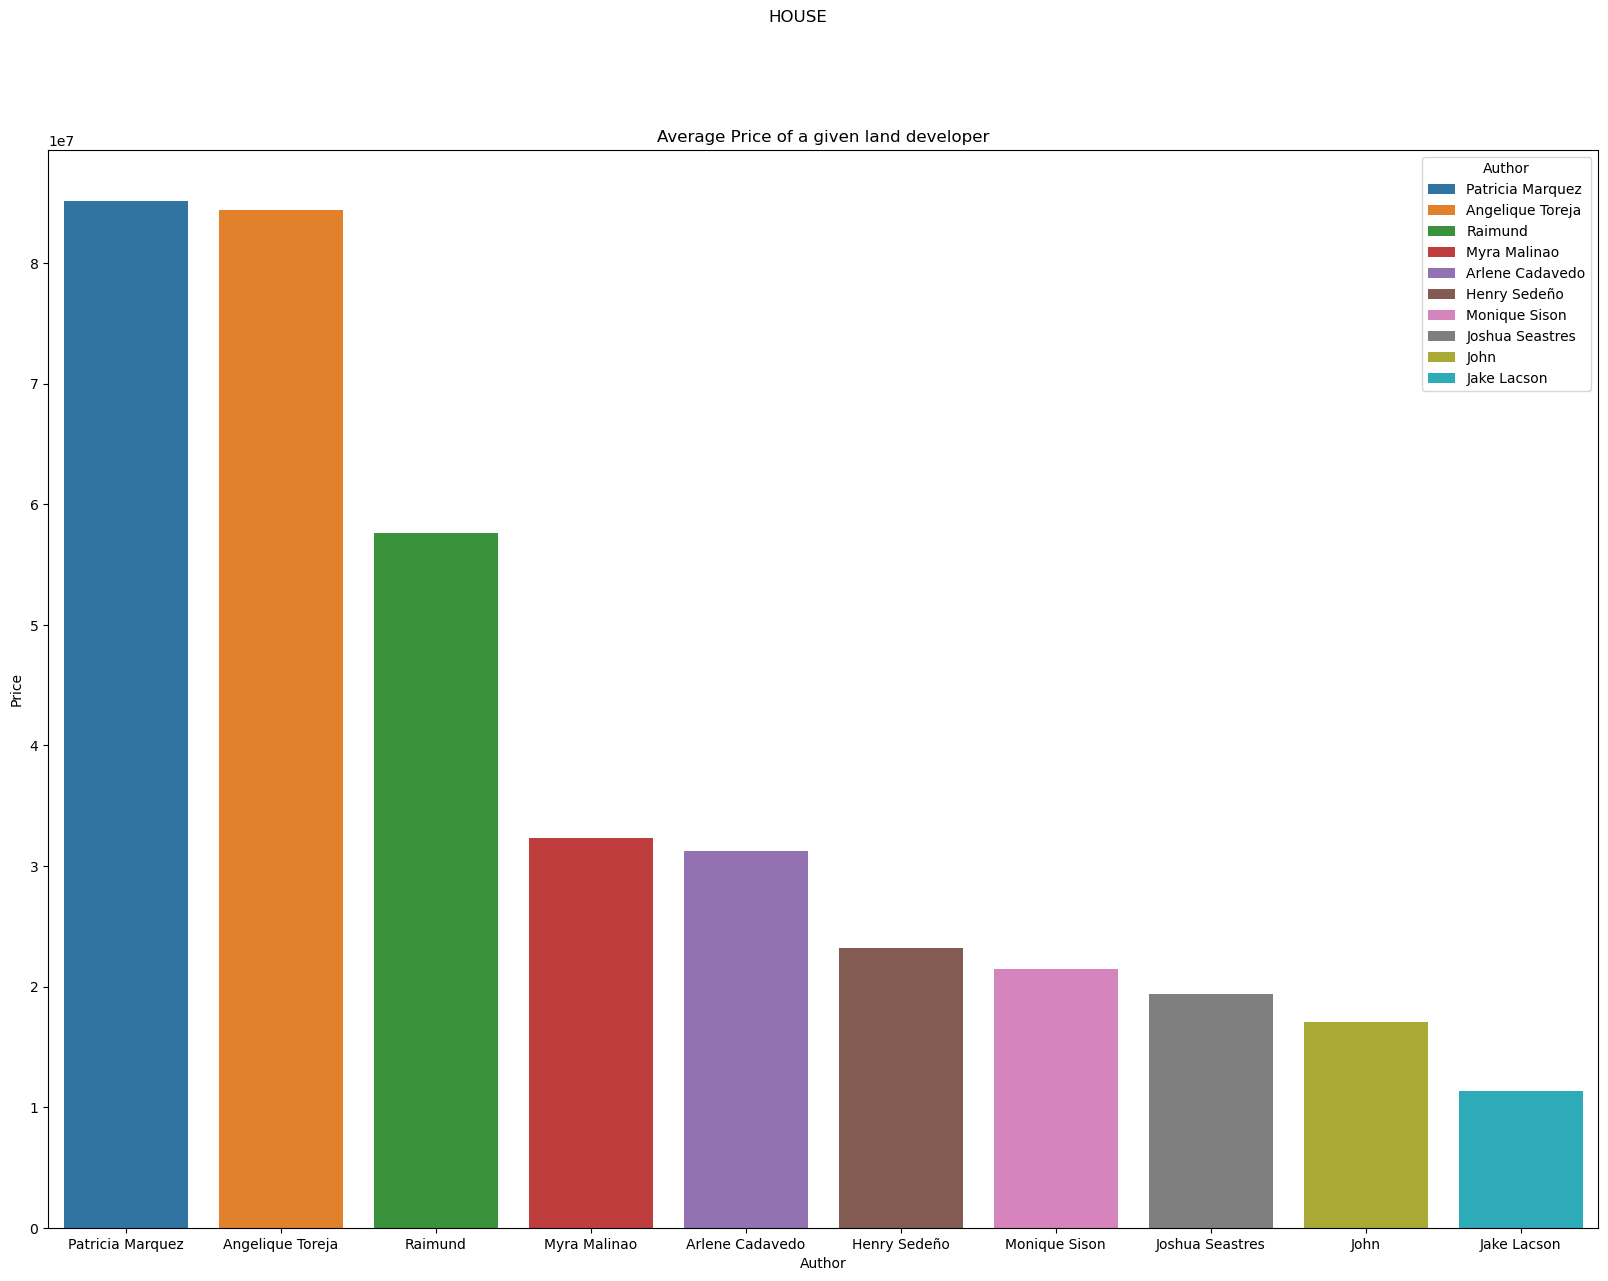

In [202]:
plt.figure(figsize=(20,14))
sns.barplot(x = r2author["Author"], y=r2author["Price"], hue=r2author["Author"], dodge=False, ci=None)
plt.xlabel("Author")
plt.ylabel("Price")
plt.suptitle("HOUSE")
plt.title("Average Price of a given land developer")
plt.show()

## RQ 3 [needs visualization, comparative barplot]
Does nearby places of the condo affect its pricing?

Answer:

In [205]:
nearby_places = list(set(sum([x for x in df['Nearby Places']], [])))
len(nearby_places)

4

In [206]:
one_hot_encoded_np = df.copy()
for i in nearby_places:
    one_hot_encoded_np.insert(loc=len(one_hot_encoded_np.columns), column=i, value = 0)

In [207]:
for n_p in nearby_places:
    one_hot_encoded_np[n_p] = one_hot_encoded_np.apply(lambda x: 1 if n_p in x['Nearby Places'] else 0, axis=1)

In [208]:
# filter to condos, since only those has nearby places
one_hot_encoded_np = one_hot_encoded_np[one_hot_encoded_np['Type'] == 'Condo']

In [209]:
one_hot_encoded_np[nearby_places].sum().sort_values(ascending=False)

Hospital              1022
Mall                   984
School                 934
Transportation hub     834
dtype: int64

In [218]:
r3_1 = one_hot_encoded_np[one_hot_encoded_np['Price'] > np.mean(df['Price'])][nearby_places].sum().sort_values(ascending=False).reset_index()
r3_1.columns =['nearby_places', 'High']
r3_1

,nearby_places,High
0,Hospital,177
1,Mall,173
2,School,144
3,Transportation hub,138


In [219]:
r3_2 = one_hot_encoded_np[df['Price'] < np.mean(df['Price'])][nearby_places].sum().sort_values(ascending=False).reset_index()
r3_2.columns =['nearby_places', 'Low']
r3_2

C:\Users\tiucz\AppData\Local\Temp\ipykernel_7860\2642943642.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  r3_2 = one_hot_encoded_np[df['Price'] < np.mean(df['Price'])][nearby_places].sum().sort_values(ascending=False).reset_index()


,nearby_places,Low
0,Hospital,845
1,Mall,811
2,School,790
3,Transportation hub,696


In [220]:
r3_df = pd.merge(r3_1, r3_2, how='inner', on = 'nearby_places')
r3_df

,nearby_places,High,Low
0,Hospital,177,845
1,Mall,173,811
2,School,144,790
3,Transportation hub,138,696


<AxesSubplot:xlabel='nearby_places'>

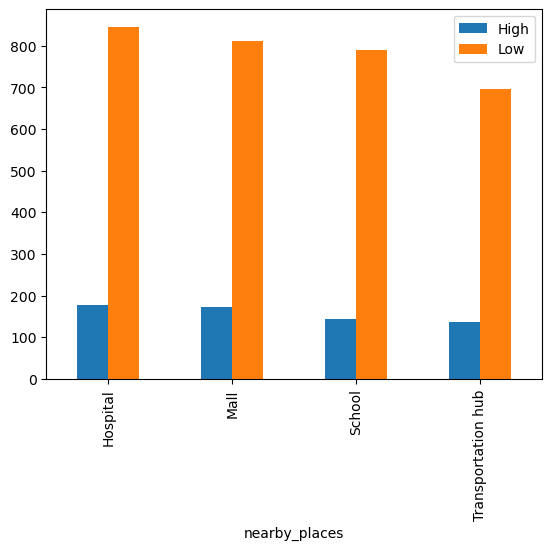

In [223]:
r3_df.plot(x="nearby_places", y=["High", "Low"], kind="bar")

## RQ 4  [needs visualization]
What are the common features that exist on high-price range houses?

Answer:

### Filter High Prices (based on mean price)

In [203]:
high_prices = df[df['Price'] > np.mean(df['Price'])]
print(len(high_prices), '/', len(df))

616 / 2269


### Features/Facilities [add visualization here, most prob barplot]

In [23]:
unique_features = list(set(sum([x for x in high_prices['Features']], [])))
unique_facilities = list(set(sum([x for x in high_prices['Facilities']], [])))
feature_facilities = list(set(unique_features + unique_facilities))
len(feature_facilities)

52

In [24]:
one_hot_encoded_ff = high_prices.copy()
for i in feature_facilities:
    one_hot_encoded_ff.insert(loc=len(one_hot_encoded_ff.columns), column=i, value = 0)

In [25]:
for ff in feature_facilities:
    one_hot_encoded_ff[ff] = one_hot_encoded_ff.apply(lambda x: 1 if ff in x['Features'] or ff in x['Facilities'] else 0, axis=1)

In [26]:
# Drop un-used columns
one_hot_encoded_ff = one_hot_encoded_ff.drop(columns =['Name', 'Address', 'Author', 'Price', 'Bedrooms', 'Showers', 'Parking', 'Furnish', 'Total Developed', 'Features', 'Facilities', 'Nearby Places', 'URL', 'Timestamp', 'NFeatures', 'NFacilities', 'NNearby Places'], axis=1)

In [44]:
one_hot_encoded_ff.groupby(['Type', 'City']).sum()

Hot Tub  Entertainment Area  Outdoor Area  Function Room  \
Type  City                                                                      
Condo Cebu                 0                   0             0              1   
      Makati               1                  28             2             40   
      Malay                0                   0             0              0   
      Mandaluyong          0                  16             0             16   
      Manila               0                   7             0              9   
      Muntinlupa           2                   3             3              3   
      Parañaque            0                   0             0              1   
      Pasay                0                   1             1              1   
      Pasig                1                   3             4              8   
      Quezon               0                   2             0              3   
      San Juan             0                   0             0              6   
      Taguig              12                  24            10             48   
House Antipolo             0                   0             0              0   
      Bacoor               0                   0             0              0   
      Baguio               0                   0             0              0   
      Biñan                0                   0             0              0   
      Carmona              0                   0             0              0   
      Cebu                 0                   0             0              0   
      Central Luzon        0                   0             0              0   
      Dasmariñas           0                   0             0              0   
      Imus                 0                   0             0              0   
      Laguna               0                   0             0              0   
      Lapu-Lapu            0                   0             0              0   
      Las Piñas            0                   0             0              0   
      Makati               0                   0             0              0   
      Mandaluyong          0                   0             0              0   
      Manila               0                   0             0              0   
      Marikina             0                   0             0              0   
      Muntinlupa           0                   0             0              0   
      Parañaque            0                   0             0              0   
      Pasig                0                   0             0              0   
      Quezon               0                   0             0              0   
      San Juan             0                   0             0              0   
      Santa Rosa           0                   0             0              0   
      Silang               0                   0             0              0   
      Tagaytay             0                   0             0              0   
      Taguig               0                   0             0              0   
      Taytay               0                   0             0              0   
      Valencia             0                   0             0              0   

                     CCTV  Building Reception Area  Laundry station  \
Type  City                                                            
Condo Cebu              2                        0                0   
      Makati           34                       30                5   
      Malay             0                        0                0   
      Mandaluyong       6                        6                0   
      Manila            3                        2                0   
      Muntinlupa        0                        3                0   
      Parañaque         0                        1                0   
      Pasay             1                        1          

In [45]:
one_hot_encoded_ff.groupby(['Type', 'Region']).sum()

Hot Tub  Entertainment Area  \
Type  Region                                                          
Condo Central Visayas                         0                   0   
      National Capital Region                16                  84   
      Western Visayas                         0                   0   
House  Calabarzon                             0                   0   
      Central Luzon                           0                   0   
      Central Visayas                         0                   0   
      Cordillera Administrative Region        0                   0   
      National Capital Region                 0                   0   
      Northern Mindanao                       0                   0   

                                        Outdoor Area  Function Room  CCTV  \
Type  Region                                                                
Condo Central Visayas                              0              1     2   
      National Capital Region                     20            135    94   
      Western Visayas                              0              0     0   
House  Calabarzon                                  0              0     0   
      Central Luzon                                0              0     0   
      Central Visayas                              0              0     0   
      Cordillera Administrative Region             0              0     0   
      National Capital Region                      0              0     0   
      Northern Mindanao                            0              0     0   

                                        Building Reception Area  \
Type  Region                                                      
Condo Central Visayas                                         0   
      National Capital Region                               100   
      Western Visayas                                         0   
House  Calabarzon                                             0   
      Central Luzon                                           0   
      Central Visayas                                         0   
      Cordillera Administrative Region                        0   
      National Capital Region                                 0   
      Northern Mindanao                                       0   

                                        Laundry station  Clubhouse  Daycare  \
Type  Region                                                                  
Condo Central Visayas                                 0          0        0   
      National Capital Region                         8         16       20   
      Western Visayas                                 0          0        0   
House  Calabarzon                                     0          0        0   
      Central Luzon                                   0          0        0   
      Central Visayas                                 0          0        0   
      Cordillera Administrative Region                0          0        0   
      National Capital Region                         0          0        0   
      Northern Mindanao                               0          0        0   

                                        Gated  ...  Lounge  Court  Helipad  \
Type  Region                                   ...                           
Condo Central Visayas                       0  ...       1      0        0   
      National Capital Region               1  ...      92     16        9   
      Western Visayas                       0  ...       0      0        0   
House  Calabarzon                          22  ...       0      0        0   
      Central Luzon                         1  ...       0      0        0   
      Central Visayas                       4  ...       0      0        0   
      Cordillera Administrative Region      1  ...       0      0        0   
      National Capital Region             181  ...       0      0        0   
      Northern Mindana

In [46]:
one_hot_encoded_ff.groupby(['Type', 'Island']).sum()

Hot Tub  Entertainment Area  Outdoor Area  Function Room  \
Type  Island                                                               
Condo Luzon          16                  84            20            135   
      Visayas         0                   0             0              1   
House Luzon           0                   0             0              0   
      Mindanao        0                   0             0              0   
      Visayas         0                   0             0              0   

                CCTV  Building Reception Area  Laundry station  Clubhouse  \
Type  Island                                                                
Condo Luzon       94                      100                8         16   
      Visayas      2                        0                0          0   
House Luzon        0                        0                0          0   
      Mindanao     0                        0                0          0   
      Visayas      0                        0                0          0   

                Daycare  Gated  ...  Lounge  Court  Helipad  Fitness Center  \
Type  Island                    ...                                           
Condo Luzon          20      1  ...      92     16        9             178   
      Visayas         0      0  ...       1      0        0               2   
House Luzon           0    205  ...       0      0        0               0   
      Mindanao        0      0  ...       0      0        0               0   
      Visayas         0      4  ...       0      0        0               0   

                Play Area  Balcony  Roof Deck  Pool  Yoga Studio  WiFi  
Type  Island                                                            
Condo Luzon           114       92          5   198           14    19  
      Visayas           0        1          1     2            0     1  
House Luzon             0       85          0    76            0    17  
      Mindanao          0        0          0     0            0     0  
      Visayas           0        3          0     4            0     0  

[5 rows x 52 columns]

In [47]:
one_hot_encoded_ff[one_hot_encoded_ff['Type'] == 'Condo'].iloc[:, 4:].sum().sort_values(ascending=False)

Pool                        200
Fitness Center              180
Central air conditioning    177
Built-in wardrobes          160
Security                    149
Function Room               136
Stove/Burner                126
Ensuite                     122
Range Hood                  118
Play Area                   114
Floorboards                 111
Garden/Lanai                104
Building Reception Area     100
CCTV                         96
Lobby                        95
Lounge                       93
Balcony                      93
Maid’s Room                  89
Entertainment Area           84
Utility Room                 65
Conference Room              47
Fiber ready                  46
Restaurants and/or Bars      39
Mailbox Area                 31
Co-working Space             31
Jogging Path                 30
Sauna                        26
Daycare                      20
Outdoor Area                 20
WiFi                         20
Retail Area                  16
Court   

In [48]:
one_hot_encoded_ff[one_hot_encoded_ff['Type'] == 'House'].iloc[:, 4:].sum().sort_values(ascending=False)

Garage Space                349
Garden/Lanai                242
Maid’s Quarters             231
Fully Fenced                215
Gated                       209
Dirty Kitchen               166
Laundry Area                152
Balcony                      88
Pool                         80
Fiber ready                  56
WiFi                         17
Built-in wardrobes            1
Court                         0
Lounge                        0
Connected to mall             0
Conference Room               0
Water Feature                 0
Jogging Path                  0
Helipad                       0
Fitness Center                0
Play Area                     0
Roof Deck                     0
Pets Allowed                  0
Retail Area                   0
Garbage Chute                 0
Yoga Studio                   0
Maid’s Room                   0
Hot Tub                       0
Range Hood                    0
Entertainment Area            0
Outdoor Area                  0
Function

In [49]:
one_hot_encoded_ff.iloc[:, 4:].sum().sort_values(ascending=False)

Garage Space                350
Garden/Lanai                346
Pool                        280
Maid’s Quarters             232
Fully Fenced                216
Gated                       210
Balcony                     181
Fitness Center              180
Central air conditioning    177
Dirty Kitchen               166
Built-in wardrobes          161
Laundry Area                153
Security                    149
Function Room               136
Stove/Burner                126
Ensuite                     122
Range Hood                  118
Play Area                   114
Floorboards                 111
Fiber ready                 102
Building Reception Area     100
CCTV                         96
Lobby                        95
Lounge                       93
Maid’s Room                  89
Entertainment Area           84
Utility Room                 65
Conference Room              47
Restaurants and/or Bars      39
WiFi                         37
Mailbox Area                 31
Co-worki

### Nearby Places [add visualization here, most prob barplot]

In [34]:
nearby_places = list(set(sum([x for x in high_prices['Nearby Places']], [])))
len(nearby_places)

4

In [35]:
one_hot_encoded_np = high_prices.copy()
for i in nearby_places:
    one_hot_encoded_np.insert(loc=len(one_hot_encoded_np.columns), column=i, value = 0)

In [36]:
for n_p in nearby_places:
    one_hot_encoded_np[n_p] = one_hot_encoded_np.apply(lambda x: 1 if n_p in x['Nearby Places'] else 0, axis=1)

In [37]:
# drop un-used columns
one_hot_encoded_np = one_hot_encoded_np.drop(columns =['Name', 'Address', 'Author', 'Price', 'Bedrooms', 'Showers', 'Parking', 'Furnish', 'Total Developed', 'Features', 'Facilities', 'Nearby Places', 'URL', 'Timestamp', 'NFeatures', 'NFacilities', 'NNearby Places'], axis=1)

In [38]:
# filter to condos, since only those has nearby places
one_hot_encoded_np = one_hot_encoded_np[one_hot_encoded_np['Type'] == 'Condo']

In [39]:
one_hot_encoded_np.groupby(['City']).sum()

,Mall,School,Transportation hub,Hospital
City,,,,
Cebu,1,1,1,1
Makati,73,59,54,73
Malay,0,0,0,0
Mandaluyong,17,17,17,17
Manila,2,2,2,2
Muntinlupa,3,3,3,3
Parañaque,0,0,0,0
Pasay,1,0,0,1
Pasig,10,14,10,14


In [40]:
one_hot_encoded_np.groupby(['Region']).sum()

,Mall,School,Transportation hub,Hospital
Region,,,,
Central Visayas,1,1,1,1
National Capital Region,172,143,137,176
Western Visayas,0,0,0,0


In [41]:
one_hot_encoded_np.groupby(['Island']).sum()

,Mall,School,Transportation hub,Hospital
Island,,,,
Luzon,172,143,137,176
Visayas,1,1,1,1


In [42]:
one_hot_encoded_np[['Transportation hub', 'Mall', 'School', 'Hospital']].sum().sort_values(ascending=False)

Hospital              177
Mall                  173
School                144
Transportation hub    138
dtype: int64

## RQ 5 [needs visualization]
What is the average size of houses (in square meters) in a given area?

In [228]:
r5 = df[df.Type == "House"]
r5city = r5.groupby(['Type', 'City'])['Total Developed'].mean().sort_values(ascending=False).reset_index()
r5city

,Type,City,Total Developed
0,House,Botolan,5000.000000
1,House,Silang,695.000000
2,House,Muntinlupa,552.035714
3,House,Quezon,511.227586
4,House,Biñan,460.500000
...,...,...,...
58,House,Batangas,51.000000
59,House,Tanza,48.000000
60,House,San Jose Del Monte,44.000000
61,House,Pandi,42.000000


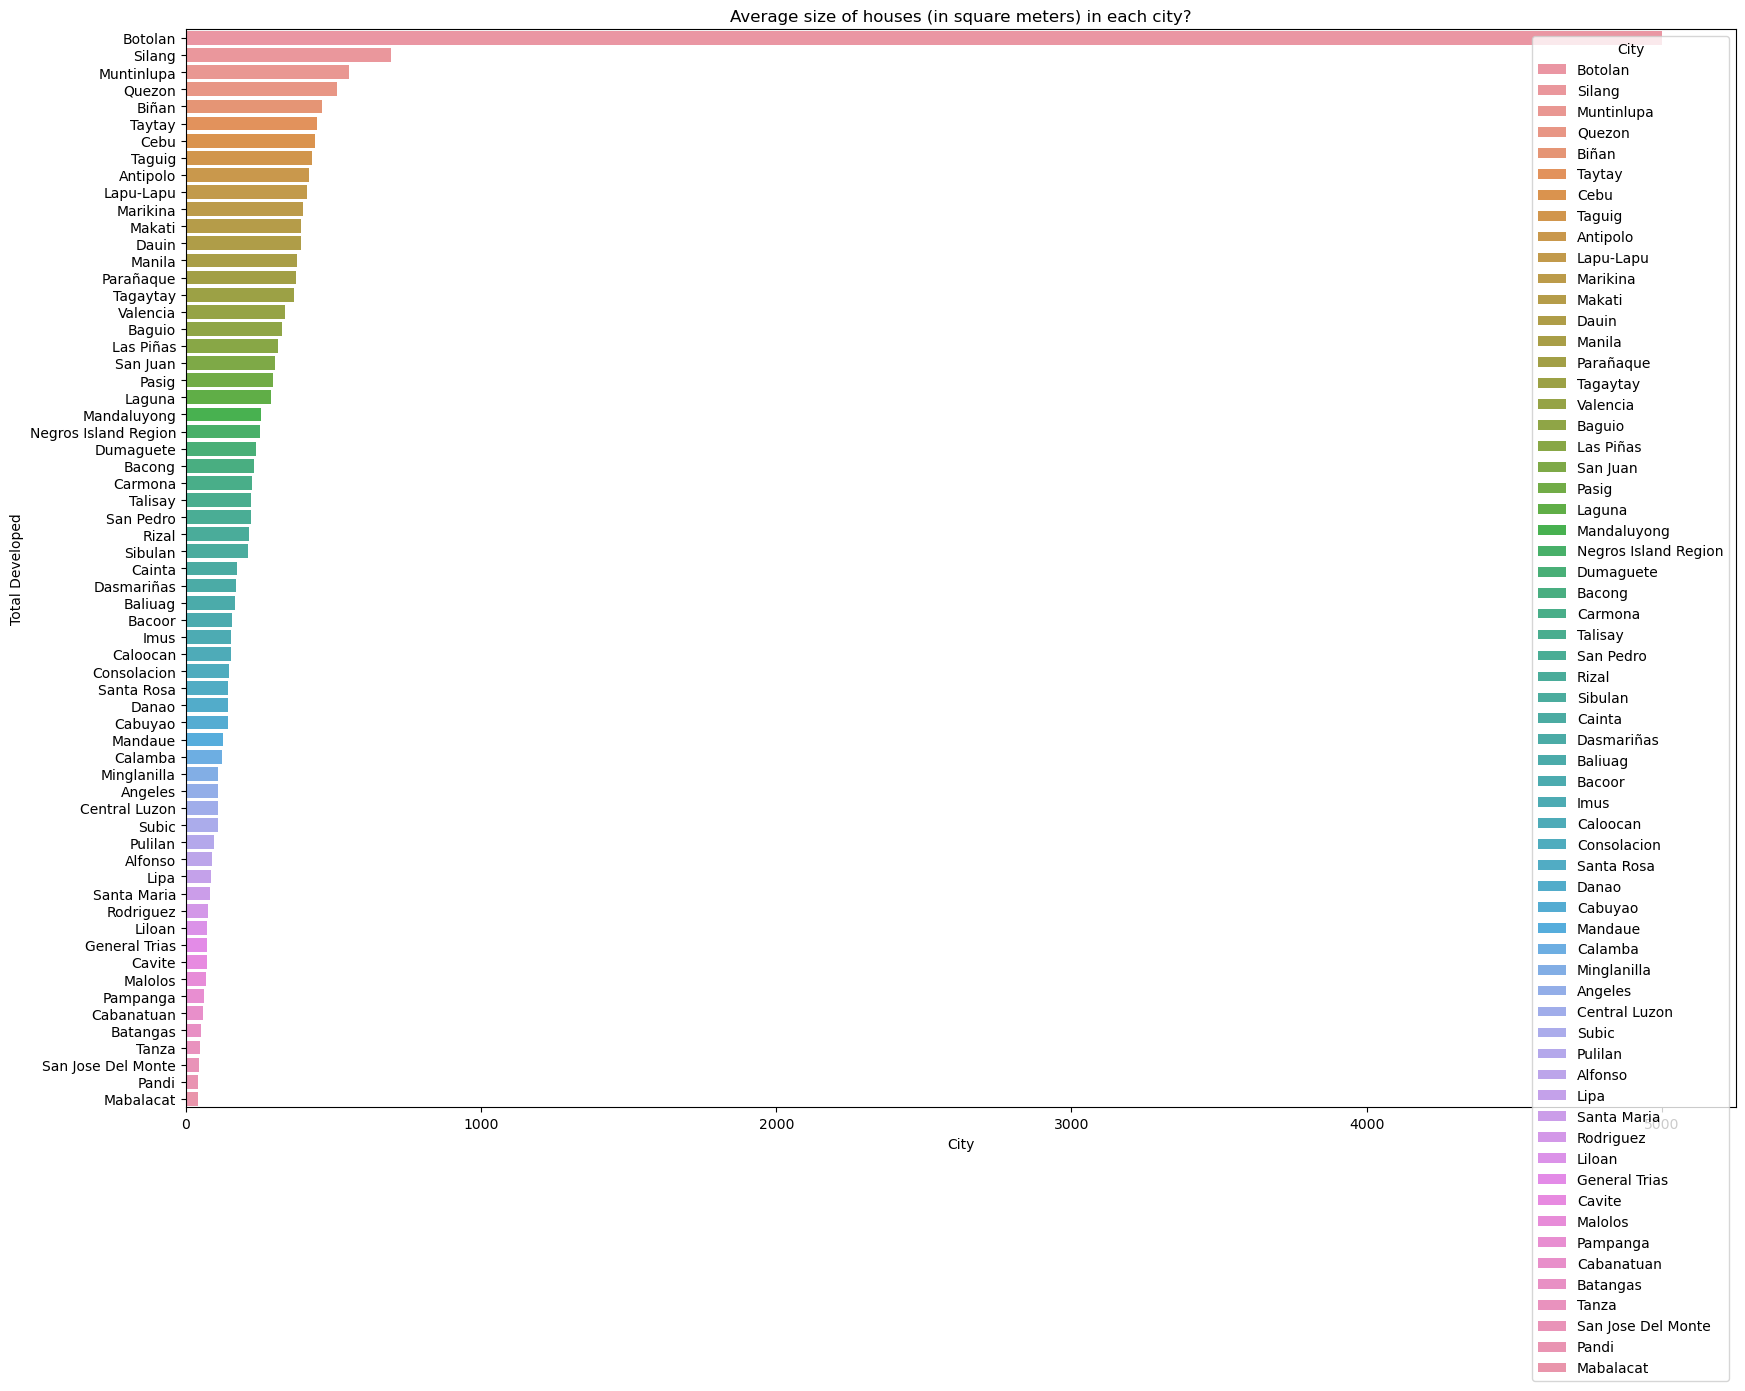

In [229]:
plt.figure(figsize=(20,14))
sns.barplot(x=r5city["Total Developed"] , y=r5city["City"], hue=r5city["City"], dodge=False, ci=None)
plt.xlabel("City")
plt.ylabel("Total Developed")
plt.title("Average size of houses (in square meters) in each city")
plt.show()

In [231]:
r5region = r5.groupby(['Type', 'Region'])['Total Developed'].mean().sort_values(ascending=False).reset_index()
r5region 

,Type,Region,Total Developed
0,House,National Capital Region,398.931741
1,House,Northern Mindanao,336.900000
2,House,Cordillera Administrative Region,326.666667
3,House,Central Visayas,253.964706
4,House,Calabarzon,204.102407
5,House,Central Luzon,183.489362


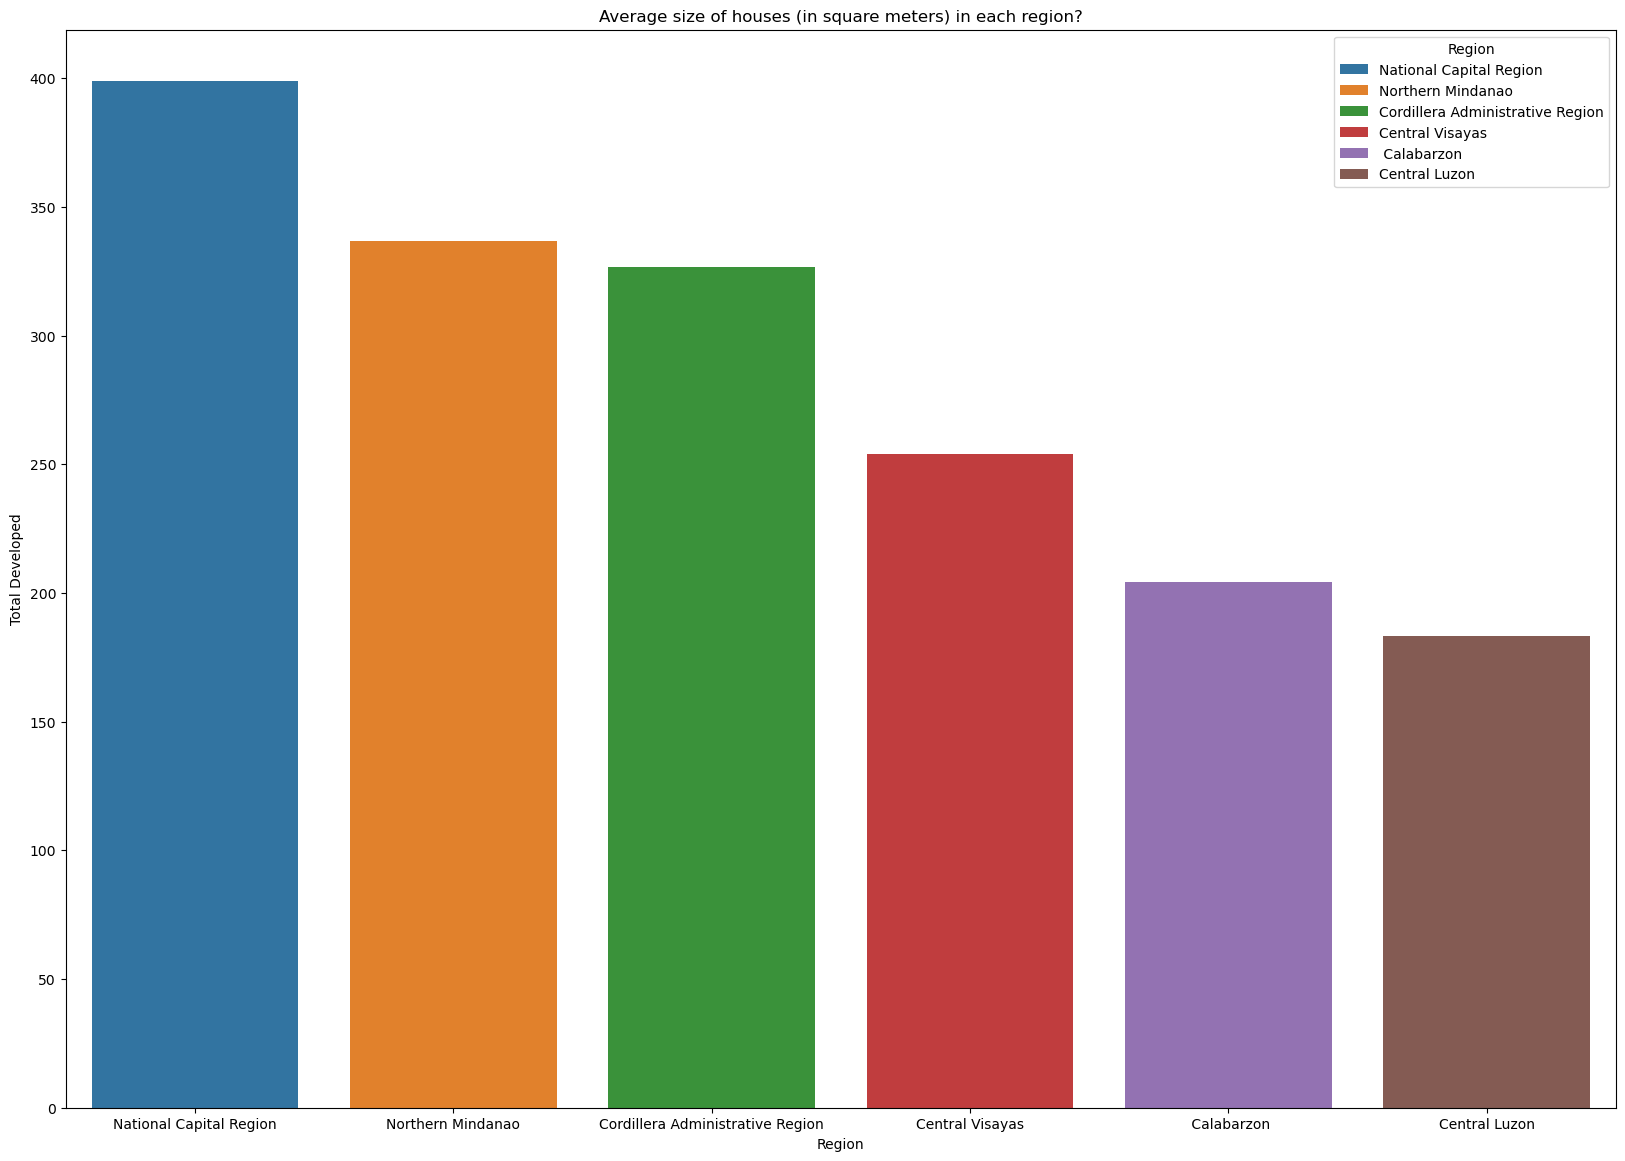

In [233]:
plt.figure(figsize=(20,14))
sns.barplot(x=r5region["Region"], y=r5region["Total Developed"] , hue=r5region["Region"], dodge=False, ci=None)
plt.xlabel("Region")
plt.ylabel("Total Developed")
plt.title("Average size of houses (in square meters) in each region")
plt.show()

In [234]:
r5island = r5.groupby(['Type', 'Island'])['Total Developed'].mean().sort_values(ascending=False).reset_index()
r5island

,Type,Island,Total Developed
0,House,Luzon,346.419286
1,House,Mindanao,336.900000
2,House,Visayas,253.964706


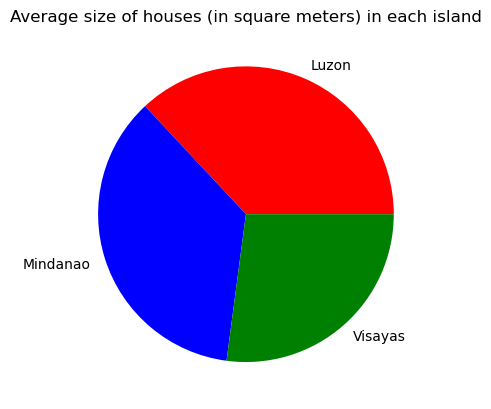

In [237]:
plt.pie(r5island["Total Developed"], labels = r5island["Island"], colors=[colors[v] for v in r5island["Island"].value_counts().keys()])
plt.title("Average size of houses (in square meters) in each island")
plt.show()